#   Sudakov form factor and Monte Carlo integration.

   We calculate the Sudakov form factor
   and plot it for different upper scales as function of pt

###   Authors: H. Jung, A. Bermudez Martinez, L.I. Estevez Banos, J. Lidrych, M. Mendizabal Morentin, S. Taheri Monfared, P. L.S. Connor, Q. Wang, H. Yang, R. Zlebcik 

In [1]:
# Import libraries which will be needed
from math import pi, sqrt, log, exp
from ROOT import TH1D, TCanvas, gRandom,gStyle

Welcome to JupyROOT 6.22/00


The strong coupling alpha_s, input q is in GeV

In [2]:
def alphaS(q):
    QCDlam = 0.2  #Lambda QCD for 3 flavours
    Qlam0  = 1    #scale freezing
    nf     = 3    #number of flavours
    beta0  = (33 - 2*nf) / 6 
    Qval = max(Qlam0, q)
    return pi / (beta0*log(Qval/QCDlam))

The splitting function at the LO without $\alpha_s$
gluon -> gluon or quark -> quark splitting

In [3]:
def Splitting(z):
    # return 6*(1/z -2 +z*(1-z) + 1/(1-z)) # g -> g
    return 4/3*((1+z*z)/(1-z)) # q -> q

Integrand inside of the Sudakov, 
note this is a bit different from C++ example

In [4]:
def suda(t1, t2):
    # Generate randomly q2
    q2 = t1*pow(t2/t1, gRandom.Uniform())
    # we generate here z1 = 1-z, 
    # because we have a pole in the splitting functions \sim 1/(1-z)       
    # Generate randomly z1
    z1min,z1max = 0.01, 0.99
    z1= z1min*pow(z1max/z1min, gRandom.Uniform())

    z = 1. - z1
    q = sqrt(q2)
    integrand = alphaS(q)/2/pi * Splitting(z) /q2	 
    weight = q2*log(t2/t1) * z1*log(z1max/z1min)
    return integrand*weight 

Book a histogram

In [6]:
TH1D.SetDefaultSumw2()
npoints = 100000
ntmax = 20
tmin, tmax = 1., 500. 
histo1 = TH1D("sudakov",";q^{2};sudakov", ntmax, tmin, tmax)


In [7]:
# Loop over data points in the histogram
sum0 = sum00 = 0

for nt in range(1, ntmax+1):
    t1 = histo1.GetBinCenter(nt)
    t2 = tmax 
    for i in range(npoints):
        ff = suda(t1, t2)
        sum0  +=  ff
        sum00 +=  ff**2
        
    sum0  /= npoints
    sum00 /= npoints
    sigma2 = sum00 - sum0*sum0
    error = sqrt(sigma2/npoints)

    sudakov = exp(-sum0)
    sudError = sudakov*error #Error of the sudakov
    
    print (" t2 = ", tmax , " t1 = ", t1 , " Delta_S = " , sudakov , " +-" , sudError) 
    histo1.SetBinContent(nt, sudakov)
    histo1.SetBinError(nt, sudError)

 t2 =  500.0  t1 =  13.475  Delta_S =  0.3309805463640781  +- 0.0002676086586669011
 t2 =  500.0  t1 =  38.425  Delta_S =  0.4835127623408347  +- 0.0002285292287213892
 t2 =  500.0  t1 =  63.375  Delta_S =  0.5680955539801948  +- 0.0002001070833986305
 t2 =  500.0  t1 =  88.32499999999999  Delta_S =  0.6284297894362725  +- 0.0001780268935184011
 t2 =  500.0  t1 =  113.27499999999999  Delta_S =  0.6760758521433455  +- 0.00015961131134226803
 t2 =  500.0  t1 =  138.225  Delta_S =  0.7155288266467261  +- 0.00014317678037534267
 t2 =  500.0  t1 =  163.17499999999998  Delta_S =  0.7490490850445063  +- 0.00012831874669131608
 t2 =  500.0  t1 =  188.125  Delta_S =  0.7786561215483672  +- 0.00011489566205904302
 t2 =  500.0  t1 =  213.075  Delta_S =  0.8051892817176851  +- 0.00010247056664900861
 t2 =  500.0  t1 =  238.02499999999998  Delta_S =  0.8289843588222955  +- 9.073611322117563e-05
 t2 =  500.0  t1 =  262.975  Delta_S =  0.8509730722026737  +- 7.995633108930334e-05
 t2 =  500.0  t1 =  

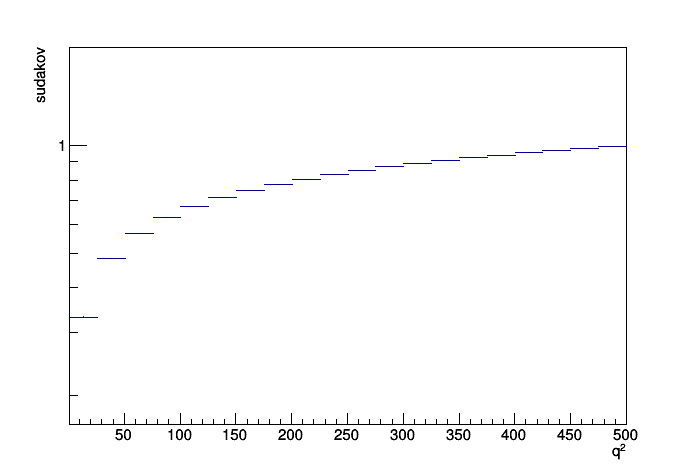

In [8]:
# Plot the Sudakov factor

c = TCanvas()
gStyle.SetPadTickY(1) # ticks at right side
gStyle.SetOptStat(0)  # get rid of statistics box
c.SetLogy()
histo1.Draw()
c.Draw()